In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving public_data.csv to public_data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['public_data.csv']))# Dataset is now stored in a Pandas Dataframe

In [ ]:
data

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
0,0.0,0.560880,0.486848,0.193378,0.156993,0.837331,0.046318,0.188749,0.736078,0.441067,0.698463,0.640968,0.446609,0.170447,0.195756,0.506325,0.473230,0.422064,0.637487,0.706186,0.162856,0.729169,0.062124,0.053928,0.154360,0.142998,0.183121,0.186869,0.149538,0.937433,0.131475,0.523914,0.670421,0.553797,c26,c9,c0,c2,c1,c1,...,c1,c1,c1,c2,c0,c0,c0,c26,c0,c0,c0,c1,c1,c0,c2,c1,c1,c0,c1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.0,0.423642,0.499371,0.266511,0.220076,0.842890,0.050709,0.778227,0.928951,0.649959,0.741095,0.467837,0.623976,0.360768,0.464526,0.468078,0.720591,0.779880,0.457502,0.403229,0.178666,0.936892,0.078256,0.044363,0.338581,0.447471,0.217865,0.894152,0.218293,0.748427,0.093915,0.437426,0.636973,0.420227,c26,c24,c0,c2,c1,c1,...,c1,c1,c1,c1,c0,c1,c0,c20,c0,c0,c0,c0,c1,c0,c2,c1,c1,c0,c1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,0.0,0.399282,0.171443,0.236797,0.132421,0.218262,0.015060,0.478113,0.667013,0.204753,0.423143,0.295205,0.436214,0.279230,0.604058,0.632089,0.593468,0.684844,0.532631,0.492775,0.208126,0.699623,0.095469,0.229781,0.046377,0.495956,0.293835,0.245285,0.193414,0.876173,0.269744,0.369828,0.552803,0.391703,c2,c24,c0,c2,c1,c1,...,c1,c1,c1,c2,c1,c0,c0,c8,c0,c0,c0,c0,c1,c0,c2,c1,c1,c0,c1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
3,0.0,0.375238,0.233658,0.360073,0.331727,0.932510,0.042414,0.530401,0.462207,0.659867,0.612997,0.530398,0.502236,0.270487,0.348409,0.775074,0.558180,0.642325,0.588281,0.509691,0.160652,0.821187,0.025915,0.037465,0.503560,0.710606,0.270038,0.301544,0.960198,0.697293,0.188926,0.199593,0.845360,0.686334,c22,c9,c0,c2,c1,c1,...,c1,c1,c1,c2,c1,c0,c0,c21,c0,c0,c0,c2,c1,c0,c2,c1,c1,c0,c1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
4,0.0,0.506671,0.175119,0.237503,0.413926,0.197257,0.042699,0.388853,0.606791,0.355147,0.501457,0.290145,0.498788,0.241697,0.518094,0.324681,0.423473,0.554706,0.269081,0.437268,0.502363,0.568866,0.080868,0.328194,0.028165,0.541146,0.190799,0.790397,0.316865,0.687546,0.568834,0.186736,0.401465,0.454780,c8,c9,c0,c2,c1,c1,...,c1,c1,c1,c2,c1,c1,c0,c8,c0,c0,c0,c2,c1,c0,c2,c1,c1,c1,c1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.6,0.366906,0.202684,0.359456,0.503119,0.867354,0.221396,0.275971,0.618822,0.734802,0.303447,0.553638,0.551238,0.349857,0.525613,0.428899,0.454298,0.653807,0.706300,0.361084,0.057957,0.888284,0.093204,0.043606,0.574090,0.458564,0.192185,0.830865,0.214606,0.906643,0.203654,0.255212,0.801049,0.721922,c12,c30,c0,c2,c1,c0,...,c1,c0,c1,c2,c1,c0,c1,c21,c1,c0,c0,c0,c0,c1,c2,c1,c1,c1,c1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
1017,0.0,0.473336,0.344834,0.162879,0.518355,0.413926,1.000000,0.515186,0.527635,0.563206,0.483709,0.507133,0.293447,0.140167,0.500396,0.338020,0.595904,0.485236,0.733054,0.377302,0.485682,0.718267,0.019962,0.056075,0.030064,0.141015,0.373522,0.316865,0.316865,0.719737,0.191892,0.308605,0.482467,0.373384,c2,c17,c0,c2,c0,c0,...,c1,c0,c1,c2,c0,c0,c0,c22,c1,c4,c4,c5,c0,c0,c2,c1,c1,c1,c1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
1018,0.0,0.643612,0.303509,0.233210,0.354637,0.122668,0.061363,0.372192,0.706580,0.351083,0.403654,0.543215,0.420660,0.218448,0.713146,0.011223,0.755059,0.731457,0.514457,0.117459,0.280918,0.725277,0.027978,0.048466,0.040250,0.230537,0.440826,0.241186,0.150169,0.757455,0.230376,0.303592,0.687047,0.725547,c8,c7,c0,c2,c0,c0,...,c1,c0,c1,c2,c1,c1,c0,c8,c0,c0,c0,c1,c0,c1,c2,c1,c1,c0,c1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1
1019,0.0,0.467666,

In [ ]:
data = data.drop(columns=['83'])

In [ ]:
binary_converted_df = data.copy()
for column in binary_converted_df.columns:
    if binary_converted_df[column].dtype != np.int64 and binary_converted_df[column].dtype != np.float64:
        if binary_converted_df[column].nunique() == 2:
            binary_converted_df[column] = (binary_converted_df[column] == "c0").astype(np.int8)

In [ ]:
binary_converted_df

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,93
0,0.0,0.560880,0.486848,0.193378,0.156993,0.837331,0.046318,0.188749,0.736078,0.441067,0.698463,0.640968,0.446609,0.170447,0.195756,0.506325,0.473230,0.422064,0.637487,0.706186,0.162856,0.729169,0.062124,0.053928,0.154360,0.142998,0.183121,0.186869,0.149538,0.937433,0.131475,0.523914,0.670421,0.553797,c26,c9,1,c2,0,0,...,c0,c1,c1,0,c2,1,c0,1,c26,1,c0,c0,c1,0,1,c2,0,c1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.0,0.423642,0.499371,0.266511,0.220076,0.842890,0.050709,0.778227,0.928951,0.649959,0.741095,0.467837,0.623976,0.360768,0.464526,0.468078,0.720591,0.779880,0.457502,0.403229,0.178666,0.936892,0.078256,0.044363,0.338581,0.447471,0.217865,0.894152,0.218293,0.748427,0.093915,0.437426,0.636973,0.420227,c26,c24,1,c2,0,0,...,c0,c1,c1,0,c1,1,c1,1,c20,1,c0,c0,c0,0,1,c2,0,c1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,0.0,0.399282,0.171443,0.236797,0.132421,0.218262,0.015060,0.478113,0.667013,0.204753,0.423143,0.295205,0.436214,0.279230,0.604058,0.632089,0.593468,0.684844,0.532631,0.492775,0.208126,0.699623,0.095469,0.229781,0.046377,0.495956,0.293835,0.245285,0.193414,0.876173,0.269744,0.369828,0.552803,0.391703,c2,c24,1,c2,0,0,...,c1,c1,c1,0,c2,0,c0,1,c8,1,c0,c0,c0,0,1,c2,0,c1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
3,0.0,0.375238,0.233658,0.360073,0.331727,0.932510,0.042414,0.530401,0.462207,0.659867,0.612997,0.530398,0.502236,0.270487,0.348409,0.775074,0.558180,0.642325,0.588281,0.509691,0.160652,0.821187,0.025915,0.037465,0.503560,0.710606,0.270038,0.301544,0.960198,0.697293,0.188926,0.199593,0.845360,0.686334,c22,c9,1,c2,0,0,...,c8,c1,c1,0,c2,0,c0,1,c21,1,c0,c0,c2,0,1,c2,0,c1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
4,0.0,0.506671,0.175119,0.237503,0.413926,0.197257,0.042699,0.388853,0.606791,0.355147,0.501457,0.290145,0.498788,0.241697,0.518094,0.324681,0.423473,0.554706,0.269081,0.437268,0.502363,0.568866,0.080868,0.328194,0.028165,0.541146,0.190799,0.790397,0.316865,0.687546,0.568834,0.186736,0.401465,0.454780,c8,c9,1,c2,0,0,...,c0,c1,c1,0,c2,0,c1,1,c8,1,c0,c0,c2,0,1,c2,0,c1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.6,0.366906,0.202684,0.359456,0.503119,0.867354,0.221396,0.275971,0.618822,0.734802,0.303447,0.553638,0.551238,0.349857,0.525613,0.428899,0.454298,0.653807,0.706300,0.361084,0.057957,0.888284,0.093204,0.043606,0.574090,0.458564,0.192185,0.830865,0.214606,0.906643,0.203654,0.255212,0.801049,0.721922,c12,c30,1,c2,0,1,...,c5,c1,c0,0,c2,0,c0,0,c21,0,c0,c0,c0,1,0,c2,0,c1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
1017,0.0,0.473336,0.344834,0.162879,0.518355,0.413926,1.000000,0.515186,0.527635,0.563206,0.483709,0.507133,0.293447,0.140167,0.500396,0.338020,0.595904,0.485236,0.733054,0.377302,0.485682,0.718267,0.019962,0.056075,0.030064,0.141015,0.373522,0.316865,0.316865,0.719737,0.191892,0.308605,0.482467,0.373384,c2,c17,1,c2,1,1,...,c5,c1,c0,0,c2,1,c0,1,c22,0,c4,c4,c5,1,1,c2,0,c1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
1018,0.0,0.643612,0.303509,0.233210,0.354637,0.122668,0.061363,0.372192,0.706580,0.351083,0.403654,0.543215,0.420660,0.218448,0.713146,0.011223,0.755059,0.731457,0.514457,0.117459,0.280918,0.725277,0.027978,0.048466,0.040250,0.230537,0.440826,0.241186,0.150169,0.757455,0.230376,0.303592,0.687047,0.725547,c8,c7,1,c2,1,1,...,c5,c1,c0,0,c2,0,c1,1,c8,1,c0,c0,c1,1,0,c2,0,c1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1
1019,0.0,0.467666,0.406235,0.111943,0.932510,0.298328,0.126440,0.559553,0.363296,0.295642,0.615297,0.31402

In [ ]:
categorical_columns = []
for column in binary_converted_df.columns:
    if binary_converted_df[column].dtype != np.int64 and binary_converted_df[column].dtype != np.float64 and \
        binary_converted_df[column].dtype != np.int8:
        categorical_columns.append(column)
categorical_columns

['34',
 '35',
 '37',
 '40',
 '41',
 '42',
 '47',
 '48',
 '49',
 '50',
 '53',
 '54',
 '55',
 '57',
 '59',
 '61',
 '63',
 '64',
 '65',
 '68',
 '70']

In [ ]:
pd.set_option('display.max_columns', 500)
dummies_df = binary_converted_df.copy()
for column in categorical_columns:
    dummies_df = pd.get_dummies(dummies_df, prefix=column, columns=[column])
dummies_df

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,36,38,39,43,44,45,46,51,52,56,58,60,62,66,67,69,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,93,34_c0,34_c1,34_c10,34_c11,34_c12,34_c13,34_c14,34_c15,34_c16,34_c17,34_c18,34_c19,34_c2,34_c20,34_c21,34_c22,34_c23,34_c24,34_c25,34_c26,34_c27,34_c3,34_c4,34_c5,34_c6,34_c7,34_c8,34_c9,35_c0,35_c1,35_c10,35_c11,35_c12,35_c13,35_c14,35_c15,35_c16,35_c17,35_c18,35_c19,35_c2,35_c20,35_c21,35_c22,35_c23,35_c24,35_c25,35_c26,35_c27,35_c28,35_c29,35_c3,35_c30,35_c4,35_c5,35_c6,35_c7,35_c8,35_c9,37_c0,37_c1,37_c2,40_c0,40_c1,40_c2,40_c3,40_c4,40_c5,40_c6,40_c7,40_c8,40_c9,41_c0,41_c1,41_c10,41_c11,41_c12,41_c13,41_c14,41_c15,41_c16,41_c17,41_c18,41_c19,41_c2,41_c20,41_c21,41_c22,41_c23,41_c24,41_c25,41_c26,41_c27,41_c28,41_c29,41_c3,41_c30,41_c4,41_c5,41_c6,41_c7,41_c8,41_c9,42_c0,42_c1,42_c2,42_c3,42_c4,47_c0,47_c1,47_c10,47_c11,47_c12,47_c13,47_c14,47_c15,47_c16,47_c17,47_c18,47_c19,47_c2,47_c20,47_c21,47_c22,47_c23,47_c24,47_c25,47_c26,47_c27,47_c28,47_c29,47_c3,47_c30,47_c4,47_c5,47_c6,47_c7,47_c8,47_c9,48_c0,48_c1,48_c10,48_c11,48_c12,48_c13,48_c14,48_c15,48_c16,48_c17,48_c18,48_c19,48_c2,48_c20,48_c21,48_c22,48_c23,48_c24,48_c25,48_c26,48_c27,48_c3,48_c4,48_c5,48_c6,48_c7,48_c8,48_c9,49_c0,49_c1,49_c2,49_c3,49_c4,50_c0,50_c1,50_c2,53_c0,53_c1,53_c2,53_c3,53_c4,53_c5,53_c6,53_c7,53_c8,53_c9,54_c0,54_c1,54_c2,54_c3,54_c4,55_c0,55_c1,55_c2,57_c0,57_c1,57_c2,59_c0,59_c1,59_c2,61_c0,61_c1,61_c10,61_c11,61_c12,61_c13,61_c14,61_c15,61_c16,61_c17,61_c18,61_c19,61_c2,61_c20,61_c21,61_c22,61_c23,61_c24,61_c25,61_c26,61_c27,61_c3,61_c4,61_c5,61_c6,61_c7,61_c8,61_c9,63_c0,63_c1,63_c2,63_c3,63_c4,64_c0,64_c1,64_c2,64_c3,64_c4,65_c0,65_c1,65_c2,65_c3,65_c4,65_c5,65_c6,65_c7,65_c8,65_c9,68_c0,68_c1,68_c2,70_c0,70_c1,70_c2,70_c3,70_c4
0,0.0,0.560880,0.486848,0.193378,0.156993,0.837331,0.046318,0.188749,0.736078,0.441067,0.698463,0.640968,0.446609,0.170447,0.195756,0.506325,0.473230,0.422064,0.637487,0.706186,0.162856,0.729169,0.062124,0.053928,0.154360,0.142998,0.183121,0.186869,0.149538,0.937433,0.131475,0.523914,0.670421,0.553797,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0.0,0.423642,0.499371,0.266511,0.220076,0.842890,0.050709,0.778227,0.928951,0.649959,0.741095,0.467837,0.623976,0.360768,0.464526,0.468078,0.720591,0.779880,0.457502,0.403229,0.178666,0.936892,0.078256,0.044363,0.338581,0.447471,0.217865,0.894152,0.218293,0.748427,0.093915,0.437426,0.636973,0.420227,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0.0,0.399282,0.171443,0.236797,0.132421,0.218262,0.015060,0.478113,0.667013,0.204753,0.423143,0.295205,0.436214,0.279230,0.604058,0.632089,0.593468,0.684844,0.532631,0.492775,0.208126,0.699623,0.095469,0.229781,0.046377,0.495956,0.293835,0.245285,0.193414,0.876173,0.269744,0.369828,0.552803,0.391703,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [ ]:
dummies_without_c0_df = dummies_df.copy()
for column in categorical_columns:
    dummies_without_c0_df = dummies_without_c0_df.drop(columns=[column + "_c0"])
dummies_without_c0_df

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,36,38,39,43,44,45,46,51,52,56,58,60,62,66,67,69,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,93,34_c1,34_c10,34_c11,34_c12,34_c13,34_c14,34_c15,34_c16,34_c17,34_c18,34_c19,34_c2,34_c20,34_c21,34_c22,34_c23,34_c24,34_c25,34_c26,34_c27,34_c3,34_c4,34_c5,34_c6,34_c7,34_c8,34_c9,35_c1,35_c10,35_c11,35_c12,35_c13,35_c14,35_c15,35_c16,35_c17,35_c18,35_c19,35_c2,35_c20,35_c21,35_c22,35_c23,35_c24,35_c25,35_c26,35_c27,35_c28,35_c29,35_c3,35_c30,35_c4,35_c5,35_c6,35_c7,35_c8,35_c9,37_c1,37_c2,40_c1,40_c2,40_c3,40_c4,40_c5,40_c6,40_c7,40_c8,40_c9,41_c1,41_c10,41_c11,41_c12,41_c13,41_c14,41_c15,41_c16,41_c17,41_c18,41_c19,41_c2,41_c20,41_c21,41_c22,41_c23,41_c24,41_c25,41_c26,41_c27,41_c28,41_c29,41_c3,41_c30,41_c4,41_c5,41_c6,41_c7,41_c8,41_c9,42_c1,42_c2,42_c3,42_c4,47_c1,47_c10,47_c11,47_c12,47_c13,47_c14,47_c15,47_c16,47_c17,47_c18,47_c19,47_c2,47_c20,47_c21,47_c22,47_c23,47_c24,47_c25,47_c26,47_c27,47_c28,47_c29,47_c3,47_c30,47_c4,47_c5,47_c6,47_c7,47_c8,47_c9,48_c1,48_c10,48_c11,48_c12,48_c13,48_c14,48_c15,48_c16,48_c17,48_c18,48_c19,48_c2,48_c20,48_c21,48_c22,48_c23,48_c24,48_c25,48_c26,48_c27,48_c3,48_c4,48_c5,48_c6,48_c7,48_c8,48_c9,49_c1,49_c2,49_c3,49_c4,50_c1,50_c2,53_c1,53_c2,53_c3,53_c4,53_c5,53_c6,53_c7,53_c8,53_c9,54_c1,54_c2,54_c3,54_c4,55_c1,55_c2,57_c1,57_c2,59_c1,59_c2,61_c1,61_c10,61_c11,61_c12,61_c13,61_c14,61_c15,61_c16,61_c17,61_c18,61_c19,61_c2,61_c20,61_c21,61_c22,61_c23,61_c24,61_c25,61_c26,61_c27,61_c3,61_c4,61_c5,61_c6,61_c7,61_c8,61_c9,63_c1,63_c2,63_c3,63_c4,64_c1,64_c2,64_c3,64_c4,65_c1,65_c2,65_c3,65_c4,65_c5,65_c6,65_c7,65_c8,65_c9,68_c1,68_c2,70_c1,70_c2,70_c3,70_c4
0,0.0,0.560880,0.486848,0.193378,0.156993,0.837331,0.046318,0.188749,0.736078,0.441067,0.698463,0.640968,0.446609,0.170447,0.195756,0.506325,0.473230,0.422064,0.637487,0.706186,0.162856,0.729169,0.062124,0.053928,0.154360,0.142998,0.183121,0.186869,0.149538,0.937433,0.131475,0.523914,0.670421,0.553797,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0.0,0.423642,0.499371,0.266511,0.220076,0.842890,0.050709,0.778227,0.928951,0.649959,0.741095,0.467837,0.623976,0.360768,0.464526,0.468078,0.720591,0.779880,0.457502,0.403229,0.178666,0.936892,0.078256,0.044363,0.338581,0.447471,0.217865,0.894152,0.218293,0.748427,0.093915,0.437426,0.636973,0.420227,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0.0,0.399282,0.171443,0.236797,0.132421,0.218262,0.015060,0.478113,0.667013,0.204753,0.423143,0.295205,0.436214,0.279230,0.604058,0.632089,0.593468,0.684844,0.532631,0.492775,0.208126,0.699623,0.095469,0.229781,0.046377,0.495956,0.293835,0.245285,0.193414,0.876173,0.269744,0.369828,0.552803,0.391703,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
with_c0 = True
if with_c0:
    temp_df = dummies_df
else:
    temp_df = dummies_without_c0_df
corresponding_names = [[] for i in categorical_columns]
corresponding_indexes = [[] for i in categorical_columns]
translation_names = {col:col for col in temp_df.columns}
i = 0
for num in categorical_columns:
    for column in temp_df.columns:
        if column.find(num, 0, 2) == 0:
            corresponding_names[i].append(column)
            corresponding_indexes[i].append(list(temp_df.columns).index(column))
            translation_names[column] = num
    i += 1
# corresponding_names, corresponding_indexes, translation_names

In [ ]:
# with_c0 = False
if with_c0:
    temp_df = dummies_df
else:
    temp_df = dummies_without_c0_df
X = temp_df.drop(columns=["target"])
y = temp_df['target']
# normalize=True
lasso = linear_model.Lasso(alpha=0.004, copy_X=True, )
lasso.fit(X, y)
# print(lasso.coef_)
weights = lasso.coef_ / np.abs(lasso.coef_).sum()
# results = []
# for i in range(len(temp_df.drop(columns=["target"]).columns)):
#     if np.abs(weights[i]) > 10**(-4):
# #         print(i+1, weights[i])
#         results.append((i+1, np.abs(weights[i])))
sum_of_weights = {}
count_elements = {}
for i in range(len(temp_df.drop(columns=["target"]).columns)):
    name = temp_df.drop(columns=["target"]).columns[i]
    value = weights[i]
    source = translation_names[name]
    if source not in sum_of_weights:
        sum_of_weights[source] = np.abs(weights[i])
        count_elements[source] = 1
    else:
        sum_of_weights[source] += np.abs(weights[i])
        count_elements[source] += 1

sorted(sum_of_weights.items(), key=lambda x: -x[1])[:15]

[('22', 0.8363474378429401),
 ('36', 0.03509593397839682),
 ('61', 0.027082512327694076),
 ('53', 0.019523618607547505),
 ('4', 0.014052493286580339),
 ('39', 0.013210149509069413),
 ('79', 0.012156022229606064),
 ('65', 0.01208736313494068),
 ('34', 0.0076631075400202964),
 ('55', 0.007393939411844716),
 ('81', 0.004870323910172741),
 ('37', 0.004082434767122399),
 ('88', 0.002944214336882721),
 ('47', 0.0014628724987605442),
 ('35', 0.0013515655548952364)]

[0]	eval-error:0.109069	train-error:0.109069
[1]	eval-error:0.109069	train-error:0.109069
[2]	eval-error:0.104167	train-error:0.104167
[3]	eval-error:0.096814	train-error:0.096814
[4]	eval-error:0.093137	train-error:0.093137
[5]	eval-error:0.083333	train-error:0.083333
[6]	eval-error:0.071078	train-error:0.071078
[7]	eval-error:0.069853	train-error:0.069853
[8]	eval-error:0.066176	train-error:0.066176
[9]	eval-error:0.060049	train-error:0.060049
[0]	eval-error:0.122399	train-error:0.122399
[1]	eval-error:0.112607	train-error:0.112607
[2]	eval-error:0.118727	train-error:0.118727
[3]	eval-error:0.111383	train-error:0.111383
[4]	eval-error:0.102815	train-error:0.102815
[5]	eval-error:0.093023	train-error:0.093023
[6]	eval-error:0.088127	train-error:0.088127
[7]	eval-error:0.083231	train-error:0.083231
[8]	eval-error:0.080783	train-error:0.080783
[9]	eval-error:0.067319	train-error:0.067319
[0]	eval-error:0.112607	train-error:0.112607
[1]	eval-error:0.101591	train-error:0.101591
[2]	eval-e

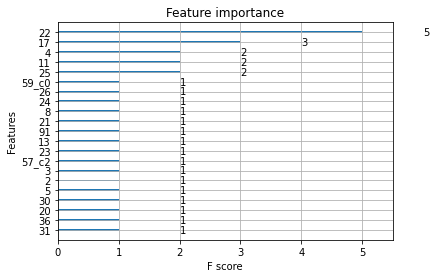

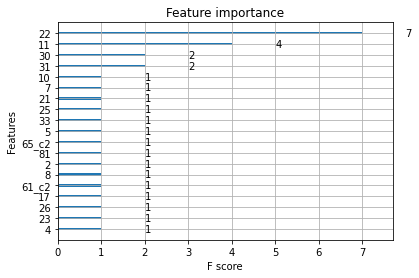

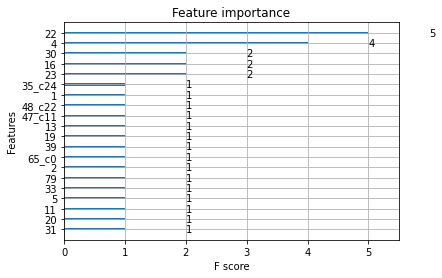

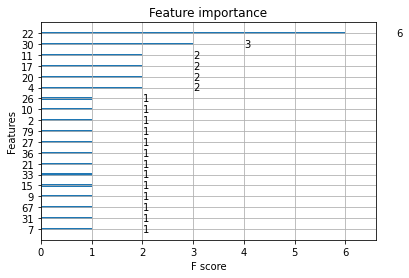

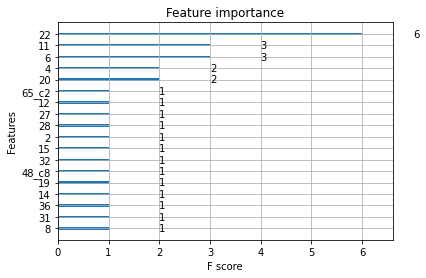

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X = temp_df.drop(columns=["target"])
y = temp_df[["target"]]
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = (y_train[["target"]] == 0.0).astype(np.int8)
    y_test = (y_test[["target"]] == 0.0).astype(np.int8)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_train, label=y_train)
    param = {'max_depth': 8, 'eta': 1, 'objective': 'binary:logistic'}
    num_round = 10
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    bst = xgb.train(param, dtrain, num_round, evallist)
    dtest = xgb.DMatrix(X_test)
    ypred = bst.predict(dtest)
    xgb.plot_importance(bst)

In [ ]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston
print("Parameter optimization")
y = temp_df[['target']]
y = (y[["target"]] == 0.0).astype(np.int8)
# y = (y[["target"]] * 5).astype(np.int8)
# y = (y[["target"]] == 1.0).astype(np.int8)
y = y["target"]
X = temp_df.drop(columns=["target"])
xgb_model = xgb.XGBClassifier(n_jobs=1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 4, 6, 8, 10, 12],
                    'n_estimators': [25, 50, 100, 150, 200]}, verbose=4, n_jobs=1)
clf.fit(X, y)
print("TUTAJ" , clf.best_score_)
print(clf.best_params_)
kwargs = clf.best_params_
best = xgb.XGBClassifier(**kwargs)
best.fit(X, y)
weights = best.feature_importances_
# dtrain = xgb.DMatrix(X, label=y)
# bst = xgb.train(clf.best_params_, dtrain, 100)
# clf = xgb.XGBClassifier(clf.best_params_)
# bst.feature_importances_


Parameter optimization
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.966, total=   0.2s
[CV] max_depth=2, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=25, score=0.971, total=   0.2s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.971, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=25, score=0.971, total=   0.2s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.966, total=   0.2s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.966, total=   0.3s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.971, total=   0.3s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.971, total=   0.3s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.971, total=   0.3s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.966, total=   0.3s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.5min finished


In [ ]:
print(weights)
sum_of_weights = {}
count_elements = {}
for i in range(len(temp_df.drop(columns=["target"]).columns)):
    name = temp_df.drop(columns=["target"]).columns[i]
    value = weights[i]
    source = translation_names[name]
    if source not in sum_of_weights:
        sum_of_weights[source] = np.abs(weights[i])
        count_elements[source] = 1
    else:
        sum_of_weights[source] += np.abs(weights[i])
        count_elements[source] += 1

sorted(sum_of_weights.items(), key=lambda x: -x[1])[:15]

[0.         0.         0.         0.05116305 0.03558531 0.
 0.         0.0523669  0.         0.         0.         0.05439213
 0.         0.         0.05796553 0.09198844 0.04538877 0.
 0.         0.06392892 0.         0.04887975 0.05368526 0.04420516
 0.         0.04079911 0.         0.         0.         0.05486955
 0.         0.06827435 0.         0.         0.         0.
 0.         0.04749357 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.04001199 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

[('16', 0.091988444),
 ('32', 0.06827435),
 ('20', 0.06392892),
 ('53', 0.05987998),
 ('15', 0.05796553),
 ('30', 0.05486955),
 ('12', 0.054392133),
 ('23', 0.05368526),
 ('8', 0.052366905),
 ('4', 0.051163048),
 ('65', 0.049847696),
 ('22', 0.048879754),
 ('44', 0.047493573),
 ('17', 0.04538877),
 ('24', 0.044205163)]

In [ ]:
0.8785509325681492 -> Kaggle 0.24287
y = (y[["target"]] == 0.0).astype(np.int8)
{'max_depth': 4, 'n_estimators': 100}
print_scores([('53', 0.07622544),
 ('34', 0.06316986),
 ('61', 0.053914174),
 ('47', 0.048733808),
 ('22', 0.04865915),
 ('65', 0.047720756),
 ('35', 0.046600815),
 ('48', 0.044283256),
 ('57', 0.03716933),
 ('55', 0.023155566),
 ('79', 0.019281039),
 ('41', 0.016278712),
 ('81', 0.014461549),
 ('4', 0.013865031),
 ('33', 0.013756614)])

1,53
1,34
1,61
1,47
1,22
1,65
1,35
1,48
1,57
1,55
1,79
1,41
1,81
1,4
1,33


In [ ]:
0.8511238641798183
{'max_depth': 2, 'n_estimators': 200}
# y = (y[["target"]] * 5).astype(np.int8)
print_scores([('48', 0.060102016),
 ('47', 0.05191663),
 ('65', 0.051464267),
 ('53', 0.043062244),
 ('22', 0.039930247),
 ('34', 0.033855595),
 ('40', 0.031241072),
 ('61', 0.030304495),
 ('41', 0.025878198),
 ('58', 0.024332395),
 ('66', 0.024164248),
 ('35', 0.021425895),
 ('57', 0.020998824),
 ('37', 0.017752167),
 ('68', 0.017139249)])

1,48
1,47
1,65
1,53
1,22
1,34
1,40
1,61
1,41
1,58
1,66
1,35
1,57
1,37
1,68


In [ ]:
0.9686609277857485 (Raczej bardzo złe i lepiej nie wrzucać - 22 jest gdzieś daleko)
{'max_depth': 2, 'n_estimators': 25}
# y = (y[["target"]] == 1.0).astype(np.int8)
print_scores([('16', 0.091988444),
 ('32', 0.06827435),
 ('20', 0.06392892),
 ('53', 0.05987998),
 ('15', 0.05796553),
 ('30', 0.05486955),
 ('12', 0.054392133),
 ('23', 0.05368526),
 ('8', 0.052366905),
 ('4', 0.051163048),
 ('65', 0.049847696),
 ('22', 0.048879754),
 ('44', 0.047493573),
 ('17', 0.04538877),
 ('24', 0.044205163)])

1,16
1,32
1,20
1,53
1,15
1,30
1,12
1,23
1,8
1,4
1,65
1,22
1,44
1,17
1,24


In [ ]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston
print("Parameter optimization")
y = temp_df[['target']]
y = (y[["target"]] == 0.0).astype(np.int8)
# y = (y[["target"]] * 5).astype(np.int8)
# y = (y[["target"]] == 1.0).astype(np.int8)
y = y["target"]
X = temp_df.drop(columns=["target"])
xgb_model = xgb.XGBClassifier(n_jobs=1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 6, 10, 15, 20],
                    'n_estimators': [50, 100, 200],
                    'min_child_weight': [1, 2, 3, 5, 8], 
                    'gamma': [0.2, 0.3, 0.4]}, verbose=4, n_jobs=1)
clf.fit(X, y)
print("TUTAJ" , clf.best_score_)
print(clf.best_params_)
kwargs = clf.best_params_
best = xgb.XGBClassifier(**kwargs)
best.fit(X, y)
weights = best.feature_importances_
# dtrain = xgb.DMatrix(X, label=y)
# bst = xgb.train(clf.best_params_, dtrain, 100)
# clf = xgb.XGBClassifier(clf.best_params_)
# bst.feature_importances_


Parameter optimization
Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50, score=0.888, total=   0.3s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50, score=0.917, total=   0.3s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50, score=0.882, total=   0.3s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50 .....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50, score=0.858, total=   0.3s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50 .....
[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=50, score=0.838, total=   0.3s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100, score=0.888, total=   0.5s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100, score=0.922, total=   0.5s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100, score=0.877, total=   0.5s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100, score=0.863, total=   0.5s
[CV] gamma=0.2, max_depth=2, min_child_weight=1, n_estimators=100 ....
[CV]  

[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed: 25.9min finished


TUTAJ 0.8844141559062649
{'gamma': 0.4, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 100}


In [ ]:
print(weights)
sum_of_weights = {}
count_elements = {}
for i in range(len(temp_df.drop(columns=["target"]).columns)):
    name = temp_df.drop(columns=["target"]).columns[i]
    value = weights[i]
    source = translation_names[name]
    if source not in sum_of_weights:
        sum_of_weights[source] = np.abs(weights[i])
        count_elements[source] = 1
    else:
        sum_of_weights[source] += np.abs(weights[i])
        count_elements[source] += 1

sorted(sum_of_weights.items(), key=lambda x: -x[1])[:15]

[0.01521975 0.01664198 0.01718987 0.02086186 0.01584139 0.01790291
 0.01848944 0.01713244 0.0188297  0.01342149 0.01583227 0.01410235
 0.01099674 0.01784546 0.01723163 0.01818961 0.0179732  0.0196667
 0.02146045 0.0156571  0.01871153 0.08540305 0.01757653 0.01824549
 0.01735319 0.01555636 0.01491415 0.01332762 0.01250012 0.01841038
 0.01526568 0.01467047 0.01574665 0.01983363 0.         0.01356898
 0.         0.01537806 0.         0.02193879 0.         0.
 0.         0.01161928 0.         0.         0.         0.01278681
 0.         0.         0.00897044 0.         0.         0.
 0.         0.01749032 0.         0.01307256 0.         0.01624214
 0.         0.         0.         0.         0.01361979 0.
 0.         0.         0.0054998  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.     

[('22', 0.08540305),
 ('55', 0.060405955),
 ('65', 0.043831814),
 ('34', 0.026204657),
 ('47', 0.022450741),
 ('46', 0.021938793),
 ('19', 0.021460455),
 ('4', 0.020861862),
 ('36', 0.019833626),
 ('18', 0.019666702),
 ('9', 0.0188297),
 ('21', 0.018711532),
 ('7', 0.018489445),
 ('30', 0.018410375),
 ('24', 0.018245488)]

In [ ]:
print_scores([('22', 0.06769126),
 ('53', 0.050172716),
 ('65', 0.044717163),
 ('34', 0.040991068),
 ('35', 0.03880201),
 ('47', 0.03668636),
 ('55', 0.031050205),
 ('48', 0.030345831),
 ('41', 0.028111234),
 ('59', 0.026228793),
 ('49', 0.020160776),
 ('88', 0.016827887),
 ('66', 0.015877664),
 ('50', 0.015287574),
 ('40', 0.015113819)])

1,22
1,53
1,65
1,34
1,35
1,47
1,55
1,48
1,41
1,59
1,49
1,88
1,66
1,50
1,40


In [ ]:
0.8844141559062649
{'gamma': 0.4, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 100}
print_scores([('22', 0.08540305),
 ('55', 0.060405955),
 ('65', 0.043831814),
 ('34', 0.026204657),
 ('47', 0.022450741),
 ('46', 0.021938793),
 ('19', 0.021460455),
 ('4', 0.020861862),
 ('36', 0.019833626),
 ('18', 0.019666702),
 ('9', 0.0188297),
 ('21', 0.018711532),
 ('7', 0.018489445),
 ('30', 0.018410375),
 ('24', 0.018245488)])

1,22
1,55
1,65
1,34
1,47
1,46
1,19
1,4
1,36
1,18
1,9
1,21
1,7
1,30
1,24


In [ ]:
def print_scores(scores):
    for tup in scores:
        print(1, ",", tup[0], sep='')

# Zamiana cliczba na liczba

In [ ]:
import io
kaggle = pd.read_csv(io.BytesIO(uploaded['public_data.csv']))# Dataset is now stored in a Pandas Dataframe

In [ ]:
kaggle = kaggle.drop(columns=['83'])

In [ ]:
for i in range(34, 73):
    kaggle[str(i)] = kaggle[str(i)].map(lambda x : int(x[1:]))

In [ ]:
kaggle

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,88,89,90,91,92,93
0,0.0,0.560880,0.486848,0.193378,0.156993,0.837331,0.046318,0.188749,0.736078,0.441067,0.698463,0.640968,0.446609,0.170447,0.195756,0.506325,0.473230,0.422064,0.637487,0.706186,0.162856,0.729169,0.062124,0.053928,0.154360,0.142998,0.183121,0.186869,0.149538,0.937433,0.131475,0.523914,0.670421,0.553797,26,9,0,2,1,1,2,30,1,1,1,0,0,11,2,0,1,1,0,0,1,1,1,2,0,0,0,26,0,0,0,1,1,0,2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.0,0.423642,0.499371,0.266511,0.220076,0.842890,0.050709,0.778227,0.928951,0.649959,0.741095,0.467837,0.623976,0.360768,0.464526,0.468078,0.720591,0.779880,0.457502,0.403229,0.178666,0.936892,0.078256,0.044363,0.338581,0.447471,0.217865,0.894152,0.218293,0.748427,0.093915,0.437426,0.636973,0.420227,26,24,0,2,1,1,0,18,1,1,1,1,0,18,26,0,0,1,1,0,1,1,1,1,0,1,0,20,0,0,0,0,1,0,2,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,0.0,0.399282,0.171443,0.236797,0.132421,0.218262,0.015060,0.478113,0.667013,0.204753,0.423143,0.295205,0.436214,0.279230,0.604058,0.632089,0.593468,0.684844,0.532631,0.492775,0.208126,0.699623,0.095469,0.229781,0.046377,0.495956,0.293835,0.245285,0.193414,0.876173,0.269744,0.369828,0.552803,0.391703,2,24,0,2,1,1,1,24,1,1,1,1,1,11,17,0,1,1,1,1,1,1,1,2,1,0,0,8,0,0,0,0,1,0,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
3,0.0,0.375238,0.233658,0.360073,0.331727,0.932510,0.042414,0.530401,0.462207,0.659867,0.612997,0.530398,0.502236,0.270487,0.348409,0.775074,0.558180,0.642325,0.588281,0.509691,0.160652,0.821187,0.025915,0.037465,0.503560,0.710606,0.270038,0.301544,0.960198,0.697293,0.188926,0.199593,0.845360,0.686334,22,9,0,2,1,1,0,6,1,1,1,1,0,30,5,0,1,1,1,8,1,1,1,2,1,0,0,21,0,0,0,2,1,0,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
4,0.0,0.506671,0.175119,0.237503,0.413926,0.197257,0.042699,0.388853,0.606791,0.355147,0.501457,0.290145,0.498788,0.241697,0.518094,0.324681,0.423473,0.554706,0.269081,0.437268,0.502363,0.568866,0.080868,0.328194,0.028165,0.541146,0.190799,0.790397,0.316865,0.687546,0.568834,0.186736,0.401465,0.454780,8,9,0,2,1,1,0,9,1,1,1,1,1,6,8,0,1,1,1,0,1,1,1,2,1,1,0,8,0,0,0,2,1,0,2,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.6,0.366906,0.202684,0.359456,0.503119,0.867354,0.221396,0.275971,0.618822,0.734802,0.303447,0.553638,0.551238,0.349857,0.525613,0.428899,0.454298,0.653807,0.706300,0.361084,0.057957,0.888284,0.093204,0.043606,0.574090,0.458564,0.192185,0.830865,0.214606,0.906643,0.203654,0.255212,0.801049,0.721922,12,30,0,2,1,0,1,30,1,1,1,1,1,11,26,0,0,1,1,5,1,0,1,2,1,0,1,21,1,0,0,0,0,1,2,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
1017,0.0,0.473336,0.344834,0.162879,0.518355,0.413926,1.000000,0.515186,0.527635,0.563206,0.483709,0.507133,0.293447,0.140167,0.500396,0.338020,0.595904,0.485236,0.733054,0.377302,0.485682,0.718267,0.019962,0.056075,0.030064,0.141015,0.373522,0.316865,0.316865,0.719737,0.191892,0.308605,0.482467,0.373384,2,17,0,2,0,0,8,17,1,1,0,1,0,7,18,0,0,1,1,5,1,0,1,2,0,0,0,22,1,4,4,5,0,0,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
1018,0.0,0.643612,0.303509,0.233210,0.354637,0.122668,0.061363,0.372192,0.706580,0.351083,0.403654,0.543215,0.420660,0.218448,0.713146,0.011223,0.755059,0.731457,0.514457,0.117459,0.280918,0.725277,0.027978,0.048466,0.040250,0.230537,0.440826,0.241186,0.150169,0.757455,0.230376,0.303592,0.687047,0.725547,8,7,0,2,0,0,0,27,1,1,1,1,1,9,8,0,0,1,1,5,1,0,1,2,1,1,0,8,0,0,0,

In [ ]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston
print("Parameter optimization")
y = kaggle[['target']]
y = (y[["target"]] == 0.0).astype(np.int8)
# y = (y[["target"]] * 5).astype(np.int8)
# y = (y[["target"]] == 1.0).astype(np.int8)
y = y["target"]
X = kaggle.drop(columns=["target"])
xgb_model = xgb.XGBClassifier(n_jobs=1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 4, 6, 8, 10, 12],
                    'n_estimators': [25, 50, 100, 150, 200]}, verbose=4, n_jobs=1)
clf.fit(X, y)
print("TUTAJ" , clf.best_score_)
print(clf.best_params_)
kwargs = clf.best_params_
best = xgb.XGBClassifier(**kwargs)
best.fit(X, y)
weights = best.feature_importances_
# dtrain = xgb.DMatrix(X, label=y)
# bst = xgb.train(clf.best_params_, dtrain, 100)
# clf = xgb.XGBClassifier(clf.best_params_)
# bst.feature_importances_


Parameter optimization
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.898, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.922, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=25, score=0.882, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.858, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.853, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.888, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.917, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.882, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.848, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.4min finished


TUTAJ 0.8834337637494022
{'max_depth': 12, 'n_estimators': 50}


In [ ]:
weights

array([0.01139953, 0.00997597, 0.01025367, 0.02017455, 0.00940222,
       0.01113035, 0.01599588, 0.01535725, 0.01305327, 0.0074844 ,
       0.01707435, 0.01053352, 0.01329158, 0.01286647, 0.01507956,
       0.01039552, 0.01704862, 0.0099947 , 0.01415316, 0.01364318,
       0.01204081, 0.0896445 , 0.01193154, 0.01600383, 0.01744195,
       0.01887347, 0.01162188, 0.01600726, 0.01394508, 0.01246812,
       0.01588164, 0.00948   , 0.0177904 , 0.01659444, 0.01557388,
       0.01855689, 0.        , 0.01608223, 0.00444801, 0.01098064,
       0.01344605, 0.0005516 , 0.        , 0.01360197, 0.00093895,
       0.00868754, 0.01076798, 0.01639714, 0.00805281, 0.02469281,
       0.        , 0.        , 0.01833638, 0.        , 0.01714727,
       0.        , 0.01317151, 0.00897841, 0.0090968 , 0.02548871,
       0.01192531, 0.        , 0.        , 0.        , 0.01651528,
       0.02219418, 0.00724578, 0.        , 0.        , 0.        ,
       0.01358438, 0.00722025, 0.        , 0.01399459, 0.00486

In [ ]:
sorted(zip(kaggle.columns, weights), key=lambda x: -x[1])[:15]

[('21', 0.0896445),
 ('59', 0.025488708),
 ('49', 0.024692815),
 ('65', 0.022194177),
 ('3', 0.02017455),
 ('80', 0.019357577),
 ('91', 0.019149825),
 ('25', 0.018873472),
 ('35', 0.01855689),
 ('52', 0.01833638),
 ('32', 0.017790396),
 ('24', 0.017441954),
 ('54', 0.017147265),
 ('10', 0.017074352),
 ('16', 0.01704862)]

In [ ]:
print_scores([('21', 0.0896445),
 ('59', 0.025488708),
 ('49', 0.024692815),
 ('65', 0.022194177),
 ('3', 0.02017455),
 ('80', 0.019357577),
 ('91', 0.019149825),
 ('25', 0.018873472),
 ('35', 0.01855689),
 ('52', 0.01833638),
 ('32', 0.017790396),
 ('24', 0.017441954),
 ('54', 0.017147265),
 ('10', 0.017074352),
 ('16', 0.01704862)])

1,21
1,59
1,49
1,65
1,3
1,80
1,91
1,25
1,35
1,52
1,32
1,24
1,54
1,10
1,16


# Bez kategorycznych

In [ ]:
import io
no_cat = pd.read_csv(io.BytesIO(uploaded['public_data.csv']))# Dataset is now stored in a Pandas Dataframe

In [ ]:
no_cat = no_cat.drop(columns=['83'])

In [ ]:
for i in range(34, 73):
    no_cat = no_cat.drop(columns=[str(i)])

In [ ]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston
print("Parameter optimization")
y = no_cat[['target']]
y = (y[["target"]] == 0.0).astype(np.int8)
# y = (y[["target"]] * 5).astype(np.int8)
# y = (y[["target"]] == 1.0).astype(np.int8)
y = y["target"]
X = no_cat.drop(columns=["target"])
xgb_model = xgb.XGBClassifier(n_jobs=1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 5, 8, 10, 15],
                    'n_estimators': [25, 50, 100, 150, 200]}, verbose=4, n_jobs=1)
clf.fit(X, y)
print("TUTAJ" , clf.best_score_)
print(clf.best_params_)
kwargs = clf.best_params_
best = xgb.XGBClassifier(**kwargs)
best.fit(X, y)
weights = best.feature_importances_
# dtrain = xgb.DMatrix(X, label=y)
# bst = xgb.train(clf.best_params_, dtrain, 100)
# clf = xgb.XGBClassifier(clf.best_params_)
# bst.feature_importances_


Parameter optimization
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.893, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.922, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.882, total=   0.0s
[CV] max_depth=2, n_estimators=25 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=25, score=0.853, total=   0.1s
[CV] max_depth=2, n_estimators=25 ....................................
[CV] ........ max_depth=2, n_estimators=25, score=0.853, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.883, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.922, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.882, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.853, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.848, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   52.2s finished


TUTAJ 0.8805117168818747
{'max_depth': 8, 'n_estimators': 50}


In [ ]:
t = sorted(zip(kaggle.columns, weights), key=lambda x: -x[1])[:15]
t

[('21', 0.8308679289627194),
 ('35', 0.048711177924256235),
 ('71', 0.00949334058347163),
 ('54', 0.008106576005190245),
 ('52', 0.007645596198513667),
 ('87', 0.0037607209581879543),
 ('80', 0.0035225298531968755),
 ('67', 0.002772897994916552),
 ('33', 0.0008543290865355072),
 ('44', 0.0006662636227702804),
 ('34', 0.0005356165462021705),
 ('46', 0.0004401200922054919),
 ('47', 0.0004271351057790358),
 ('target', 0.0),
 ('1', -0.0)]

In [ ]:
print_scores(t)

1,21
1,41
1,36
1,14
1,3
1,7
1,6
1,16
1,24
1,25
1,44
1,23
1,32
1,22
1,12


# Korelacja

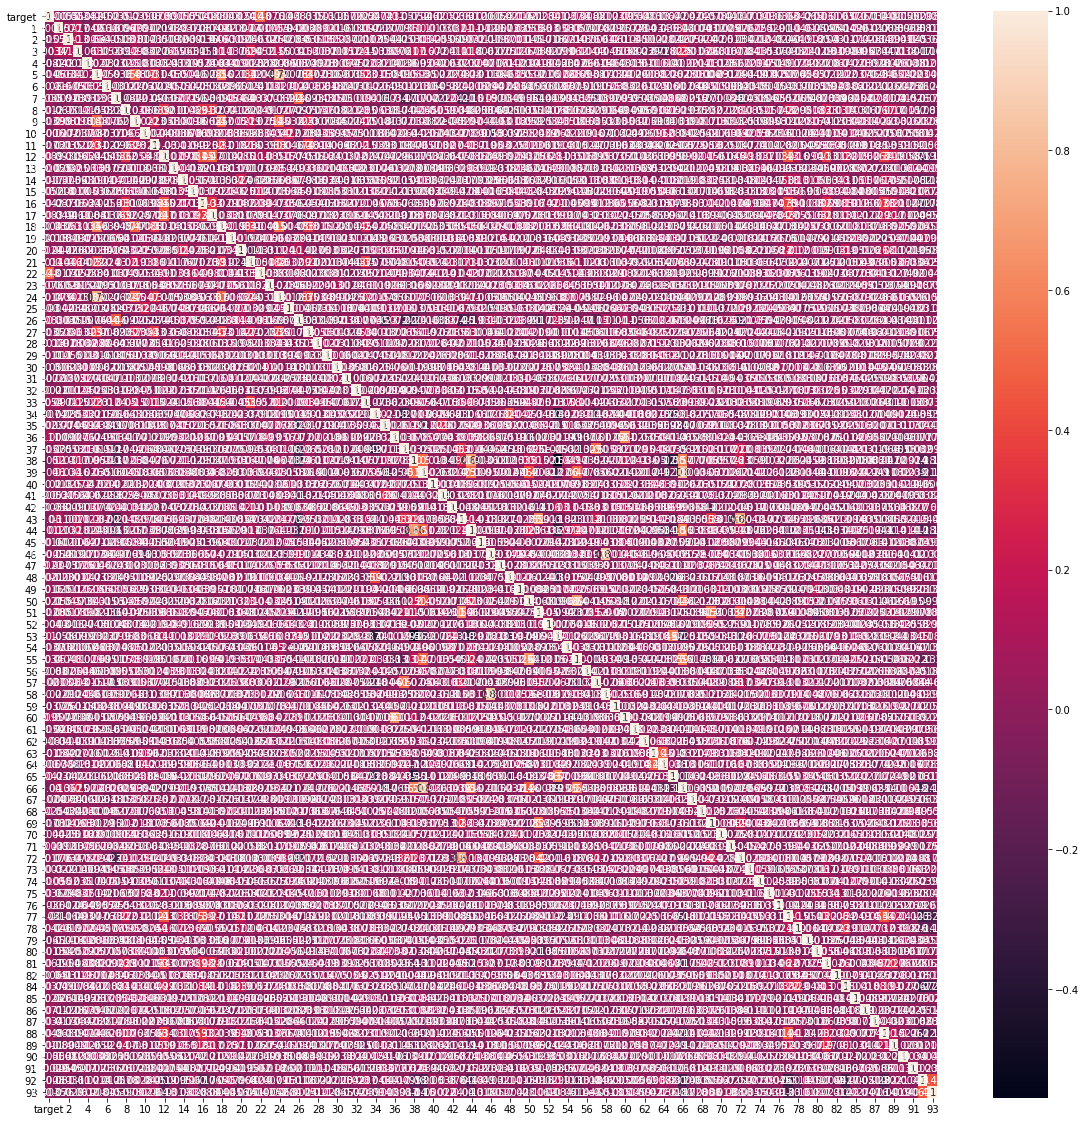

In [ ]:
corrMatrix = kaggle.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
list(kaggle.corr()["target"].abs().sort_values(ascending=False).head(16).index[1:])
# (34, 73)  53,

['22',
 '36',
 '53',
 '60',
 '12',
 '26',
 '17',
 '4',
 '69',
 '23',
 '11',
 '31',
 '86',
 '79',
 '81']

In [ ]:
list(kaggle.corr(method="kendall")["target"].abs().sort_values(ascending=False).head(16).index[1:])

['22',
 '36',
 '60',
 '69',
 '37',
 '11',
 '4',
 '17',
 '26',
 '79',
 '39',
 '90',
 '15',
 '81',
 '86']

In [ ]:
list(kaggle.corr(method="spearman")["target"].abs().sort_values(ascending=False).head(16).index[1:])

['22',
 '36',
 '60',
 '11',
 '4',
 '69',
 '17',
 '37',
 '26',
 '15',
 '79',
 '12',
 '53',
 '2',
 '5']

In [ ]:
kaggle["target"].value_counts()

0.0    854
0.6     75
0.8     58
1.0     32
0.4      1
0.2      1
Name: target, dtype: int64

In [ ]:
kaggle.groupby(["53"])["target"].value_counts()

53  target
0   0.0       324
    0.6        31
    0.8        27
    1.0         5
    0.4         1
1   0.0       190
    0.6        12
    0.8        12
    1.0         1
2   0.0       102
    0.6         4
    1.0         4
    0.8         3
3   0.0        11
    1.0         2
    0.8         1
4   0.0         1
    1.0         1
5   0.0        99
    0.6        15
    1.0         6
    0.8         1
6   0.0         2
7   0.0        20
    0.6         4
    0.8         3
    1.0         2
    0.2         1
8   0.0       100
    0.8        11
    1.0        11
    0.6         7
9   0.0         5
    0.6         2
Name: target, dtype: int64

In [ ]:
# ETS 0.30401  79-16
for i in [
('22', 0.09634778682227027),
 ('17', 0.08492211498569227),
 ('16', 0.05953699613700314),
 ('41', 0.053121224301149544),
 ('30', 0.04850457584278243),
 ('35', 0.04845404526631477),
 ('24', 0.04001808612685558),
 ('7', 0.03629588730214875),
 ('34', 0.03552094483157201),
 ('8', 0.03271476091898924),
 ('9', 0.030786422530739998),
 ('12', 0.029839337870225885),
 ('32', 0.028569600432712637),
 ('28', 0.02752487013392569),
 ('20', 0.02580035358811933)]:
    print(i[0])

22
17
16
41
30
35
24
7
34
8
9
12
32
28
20


In [ ]:
1,21
1,41
1,36
1,14
1,3
1,7
1,6
1,16
1,24
1,25
1,44
1,23
1,32
1,22
1,12

In [ ]:
pd.options.display.max_rows = 100
data.nunique().head(100)

target       6
1         1021
2          992
3          982
4          940
5          940
6          982
7         1021
8         1021
9         1021
10        1021
11        1021
12        1021
13        1000
14        1021
15        1021
16        1021
17        1021
18        1021
19        1021
20        1000
21         942
22        1017
23        1017
24         982
25        1021
26         992
27         951
28         951
29         942
30        1021
31         982
32        1021
33        1021
34          28
35          31
36           2
37           3
38           2
39           2
40          10
41          31
42           5
43           2
44           2
45           2
46           2
47          31
48          28
49           5
50           3
51           2
52           2
53          10
54           5
55           3
56           2
57           3
58           2
59           3
60           2
61          28
62           2
63           5
64           5
65          10
66        

In [ ]:
tem = kaggle.copy()
X = tem.drop(columns=["target"])
y = tem['target']
# normalize=True
lasso = linear_model.Lasso(alpha=0.0005, copy_X=True, )
lasso.fit(X, y)
# print(lasso.coef_)
weights = lasso.coef_ / np.abs(lasso.coef_).sum()
t2 = sorted(zip(temp_df.columns, weights), key=lambda x: -x[1])[:15]
t2

[('21', 0.40150236293619185),
 ('23', 0.05260638681303427),
 ('22', 0.03846613074271499),
 ('85', 0.029341714579746492),
 ('35', 0.02765523078556072),
 ('16', 0.02706305976789289),
 ('71', 0.012187069886118259),
 ('32', 0.012039678246482126),
 ('84', 0.011333989153259007),
 ('25', 0.01086324693627008),
 ('65', 0.008728929692347459),
 ('74', 0.007913974785075642),
 ('54', 0.006782362398999429),
 ('80', 0.005380935235100014),
 ('44', 0.005224922643537452)]

# Z repo z przykładami

In [ ]:
import pickle
import xgboost as xgb

import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, load_digits, load_boston

rng = np.random.RandomState(31337)

print("Zeros and Ones from the Digits dataset: binary classification")
digits = load_digits(n_class=2)
y = digits['target']
X = digits['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier(n_jobs=1).fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

print("Iris: multiclass classification")
iris = load_iris()
y = iris['target']
X = iris['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBClassifier(n_jobs=1).fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))

print("Boston Housing: regression")
boston = load_boston()
y = boston['target']
X = boston['data']
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor(n_jobs=1).fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

print("Parameter optimization")
y = boston['target']
X = boston['data']
xgb_model = xgb.XGBRegressor(n_jobs=1)
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 4, 6],
                    'n_estimators': [50, 100, 200]}, verbose=1, n_jobs=1)
clf.fit(X, y)
print("TUTAJ" , clf.best_score_)
print(clf.best_params_)

# The sklearn API models are picklable
print("Pickling sklearn API models")
# must open in binary format to pickle
pickle.dump(clf, open("best_boston.pkl", "wb"))
clf2 = pickle.load(open("best_boston.pkl", "rb"))
print(np.allclose(clf.predict(X), clf2.predict(X)))

# Early-stopping

X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = xgb.XGBClassifier(n_jobs=1)
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(X_test, y_test)])

Zeros and Ones from the Digits dataset: binary classification
[[87  0]
 [ 1 92]]
[[91  0]
 [ 3 86]]
Iris: multiclass classification
[[19  0  0]
 [ 0 31  3]
 [ 0  1 21]]
[[31  0  0]
 [ 0 16  0]
 [ 0  3 25]]
Boston Housing: regression
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
9.860776812557337
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
15.942418468446029
Parameter optimization
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] W

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.9s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)